<a href="https://colab.research.google.com/github/reddykushal7781/Numbers_Classification_CNN/blob/main/Convolution%2BNeural%2BNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A Convolutional Neural Network (CNN) is a type of deep learning model primarily used for processing structured grid data, such as images, and recognizing patterns. CNNs are widely applied in tasks like image recognition, object detection, video analysis, and natural language processing, thanks to their ability to capture spatial and hierarchical information from the data.

### Key Components of CNNs

### Convolutional Layers
These layers apply filters (kernels) to the input data to detect features, such as edges, textures, and shapes in an image.
The filter slides across the input, performing a convolution operation that produces a feature map, which highlights the presence of certain patterns in specific regions.

### Pooling Layers
Pooling layers reduce the spatial dimensions of the feature maps, which decreases the number of parameters, speeds up computation, and helps control overfitting.
The most common pooling method is max pooling, which takes the maximum value in a region, retaining only the most significant feature.

### Fully Connected Layers
After a series of convolutional and pooling layers, the output is often flattened and passed through fully connected (dense) layers.
These layers combine all features detected by the convolutional layers to make final predictions.

### Activation Functions
Activation functions introduce non-linearity into the network, allowing it to learn complex patterns.
ReLU (Rectified Linear Unit) is the most common activation function in CNNs, setting all negative values to zero to enhance computational efficiency.

### Dropout (Optional)
Dropout is a regularization technique that randomly "drops" (sets to zero) a fraction of the neurons during training, which helps prevent overfitting by ensuring that the network does not rely too heavily on specific neurons.

### How CNNs Work for Image Classification
In an image classification task, a CNN might take an image as input and perform the following steps:

1. Extract Low-Level Features: The first layers typically detect simple patterns, like edges and corners.
2. Detect Mid-Level Features: As data passes through deeper layers, the model learns more complex features, like shapes and textures.
3. Recognize High-Level Features: In the final layers, the network learns abstract concepts (e.g., parts of objects) and combines them to classify the image.
   
### Advantages of CNNs
1. Translation Invariance: CNNs can recognize patterns regardless of their position within the image.
2. Parameter Efficiency: By using shared weights (filters), CNNs require fewer parameters than fully connected neural networks, making them more computationally efficient.
3. Hierarchical Feature Learning: CNNs learn from simple to complex features, capturing intricate structures within data.

### Applications of CNNs
1. Image and Video Analysis: Face recognition, object detection, medical image analysis (e.g., MRI scans).
2. Natural Language Processing: Text classification, sentiment analysis, and language translation.
3. Self-Driving Cars: Detecting objects like pedestrians, road signs, and other vehicles.
4. Healthcare: Diagnosing diseases from medical images, analyzing x-rays, and automating pathology.
5.
CNNs are a powerful tool in the deep learning field, especially for tasks involving images or spatial data, due to their ability to understand intricate patterns.

In [2]:
# importing the necessary libraries

import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# load the train data
path = "/content/drive/MyDrive/python/class 04/Convolution Neural Network/train.csv"
train = pd.read_csv(path)
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# load the train data
path = "/content/drive/MyDrive/python/class 04/Convolution Neural Network/train.csv"
train = pd.read_csv(path)
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.shape

(42000, 785)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [7]:
path2 = "/content/drive/MyDrive/python/class 04/Convolution Neural Network/test.csv"
test = pd.read_csv(path2)
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test = pd.read_csv('test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test.shape

(28000, 784)

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [10]:
# put the labels columns as y_train

y_train = train['label']
X_train = train.drop(labels = ['label'], axis = 1)

In [11]:
y_train.head()

,label
0,1
1,0
2,1
3,4
4,0


In [12]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


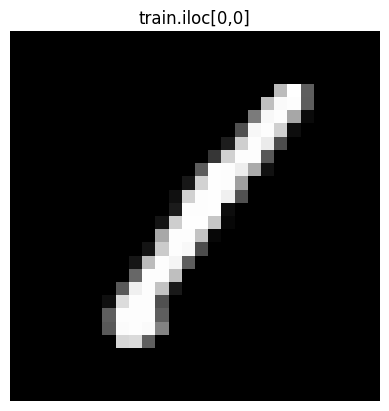

In [13]:
#plot some samples in the train

img = X_train.iloc[0].values
img = img.reshape((28,28))
plt.imshow(img, cmap = 'gray')
plt.title('train.iloc[0,0]')
plt.axis('off')
plt.show()

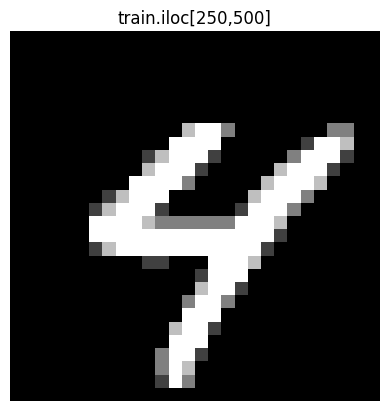

In [14]:
img = X_train.iloc[250].values
img = img.reshape((28,28))
plt.imshow(img, cmap = 'gray')
plt.title('train.iloc[250,500]')
plt.axis('off')
plt.show()

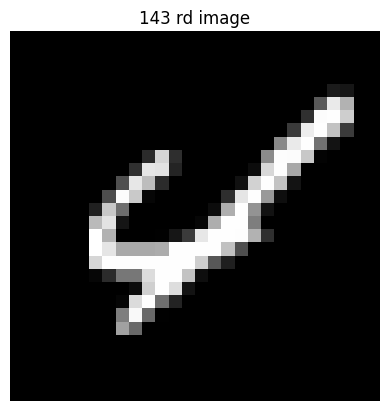

In [15]:
img = X_train.loc[143].values
# img = X_train[142, :]
img = img.reshape((28,28))
plt.imshow(img, cmap = "gray")
plt.title("143 rd image")
plt.axis('off')
plt.show()

In [16]:
y_train.value_counts()

,count
label,
1,4684
7,4401
3,4351
9,4188
2,4177
6,4137
0,4132
4,4072
8,4063


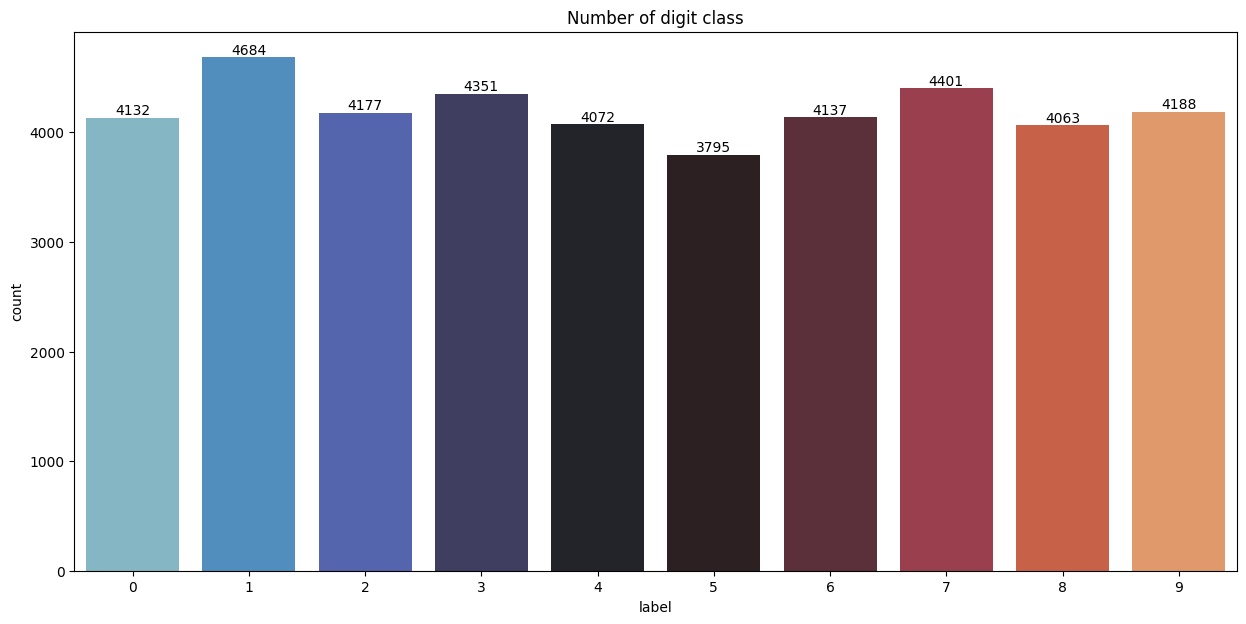

In [17]:
# plot the number of digits in the label columns

plt.figure(figsize = (15,7))
g = sns.countplot(x = y_train, palette = 'icefire')


# add labels to the bar
# for patch in g.patches:
#     height = patch.get_height()
#     g.text(patch.get_x() + patch.get_width()/2, height + 0.5, int(height), ha = 'center', va = 'bottom')
# plt.title("Number of digit class")
# plt.show()


for patch in g.patches:
  height = patch.get_height()
  g.text(
      patch.get_x() + patch.get_width()/2,
      height + 0.7,
      int(height),
      ha = "center",
      va = "bottom"
  )
plt.title("Number of digit class")
plt.show()

In [18]:
# check for missing values in any rows

missing_values = train.isnull().any(axis=1)
count_missing_values = missing_values.sum()
count_missing_values

0

In [19]:
missing_values = test.isnull().any(axis=1)
count_missing_values = missing_values.sum()
count_missing_values

0

In [20]:
# Both train and test does not have any missing values
# Normalize the image data
X_train = X_train/255.0
test = test/255.0

X_train.shape, test.shape

((42000, 784), (28000, 784))

In [21]:
# we need to reshape the images and perform a grayscale to reduce the efefct of illumination and perform normalization for all data

X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
X_train.shape, test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

In [22]:
#pip install tensorflow

In [23]:
# We will train_test_split

# Convert the lables to one-hot encoding
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
num_classes = 10
y_train = to_categorical(y_train,num_classes = num_classes)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=2)

In [25]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((37800, 28, 28, 1), (4200, 28, 28, 1), (37800, 10), (4200, 10))

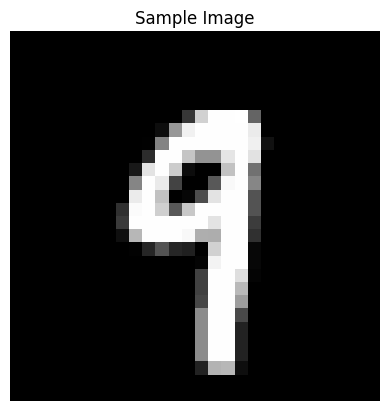

In [26]:

plt.imshow(X_train[2][:,:,0], cmap = 'gray')
plt.title('Sample Image')
plt.axis('off')
plt.show()

In [27]:
from sklearn.metrics import confusion_matrix , classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam # Adaptive Moment Estimation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### CNN is used for image classification and object detection

After having convolution layer we use ReLU to break up linearity. Increase nonlinearity. Because images are non linear.

#### Padding
As we keep applying conv layers, the size of the volume will decrease faster than we would like. In the early layers of our network, we want to preserve as much information about the original input volume so that we can extract those low level features.
input size and output size are same


#### Max Pooling
It makes down-sampling or sub-sampling (Reduces the number of parameters)
It makes the detection of features invariant to scale or orientation changes.
It reduce the amount of parameters and computation in the network, and hence to also control overfitting


#### Flattening


Full Connection
Neurons in a fully connected layer have connections to all activations in the previous layer
Artificial Neural Netwo

Implementing with Keras¶

Create Model
conv => max pool => dropout => conv => max pool => dropout => fully connected (2 layer)
Dropout: Dropout is a technique where randomly selected neurons are ignored during trails

In [28]:
# Build the CNN model

model = Sequential()
model.add(Conv2D(filters = 8, kernel_size=(5,5), padding = 'Same', activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size=(3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2), strides = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [29]:
# Define the optimizer

optimizer = Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)
model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

Epochs and Batch Size Say you have a dataset of 10 examples (or samples). You have a batch size of 2, and you've specified you want the algorithm to run for 3 epochs. Therefore, in each epoch, you have 5 batches (10/2 = 5). Each batch gets passed through the algorithm, therefore you have 5 iterations per epoch. reference:

https://stackoverflow.com/questions/4752626/epoch-vs-iteration-when-training-neural-networks


Data Augmentation To avoid overfitting problem, we need to expand artificially our handwritten digit dataset Alter the training data with small transformations to reproduce the variations of digit. For example, the number is not centered The scale is not the same (some who write with big/small numbers) The image is rotated.

In [30]:
epoch = 10
batch_size = 250

datagen = ImageDataGenerator(featurewise_center = False,
                            samplewise_center = False,
                            featurewise_std_normalization = False,
                            zca_whitening = False,
                            rotation_range = 5,
                            zoom_range = 0.1,
                            width_shift_range = 0.1,
                            height_shift_range = 0.1,
                            horizontal_flip = False,
                            vertical_flip = False)
datagen.fit(X_train)

In [31]:
history = model.fit(datagen.flow(X_train, y_train,
                                 batch_size = batch_size),
                                 epochs = epoch,
                                 validation_data = (X_val, y_val),
                                 steps_per_epoch = X_train.shape[0]//batch_size)

Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 25s 121ms/step - accuracy: 0.4463 - loss: 1.5983 - val_accuracy: 0.9174 - val_loss: 0.2870
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8080 - loss: 0.6221 - val_accuracy: 0.9129 - val_loss: 0.2906
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 30s 84ms/step - accuracy: 0.8247 - loss: 0.5525 - val_accuracy: 0.9614 - val_loss: 0.1405
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9000 - loss: 0.3503 - val_accuracy: 0.9598 - val_loss: 0.1426
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.8899 - loss: 0.3492 - val_accuracy: 0.9688 - val_loss: 0.1086
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8920 - loss: 0.3111 - val_accuracy: 0.9690 - val_loss: 0.1102
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step - accuracy: 0.9097 - loss: 0.2908 - val_accuracy: 0.9729 - val_loss: 0.0859
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9000 - loss: 0.3083 - val_acc

In [1]:
history = model.fit(datagen.flow(X_train, y_train,
                                 batch_size = batch_size),
                                 epochs = epoch,
                                 validation_data = (X_val, y_val),
                                 steps_per_epoch = X_train.shape[0]//batch_size)

NameError: name 'model' is not defined

When evaluating a machine learning model, especially a Convolutional Neural Network (CNN) for image classification, there are several key aspects to infer from the validation, training, and error metrics. Here's a breakdown of what to look for and how to interpret the results:

### 1. **Training Loss and Accuracy**

- **Training Loss**: This measures how well the model is performing on the training data. A decreasing training loss indicates that the model is learning from the training data and improving over time. If the training loss is very high, it suggests that the model is not learning effectively or that the learning rate might be too high.

- **Training Accuracy**: This shows the proportion of correctly classified samples in the training set. Increasing training accuracy indicates that the model is getting better at classifying the training samples. A high training accuracy typically means that the model is learning well from the training data.

### 2. **Validation Loss and Accuracy**

- **Validation Loss**: This measures how well the model performs on unseen validation data. A decreasing validation loss indicates that the model is generalizing well to new, unseen data. If the validation loss starts to increase while the training loss continues to decrease, this is a sign of overfitting.

- **Validation Accuracy**: This shows the proportion of correctly classified samples in the validation set. Increasing validation accuracy indicates that the model is generalizing well to unseen data. If the validation accuracy is much lower than the training accuracy, it suggests overfitting.

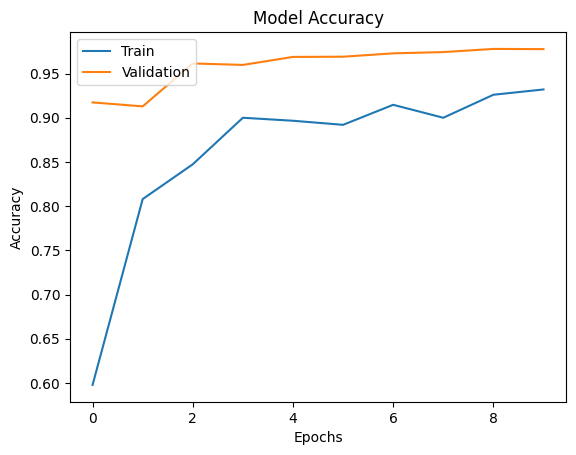

In [32]:
# Plot the training and validation accuracy and loss scores

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train','Validation'], loc = 'upper left')
plt.show()

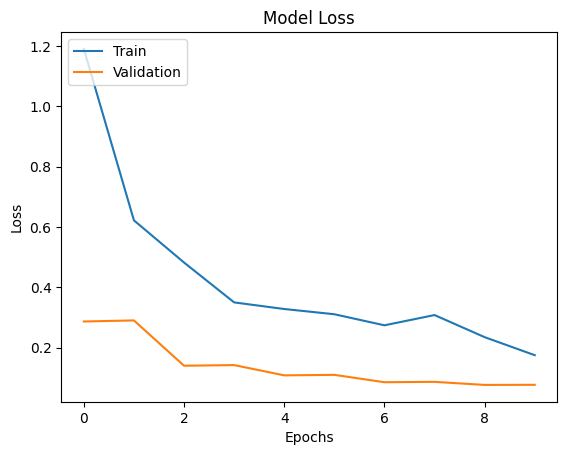

In [33]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train','Validation'], loc = 'upper left')
plt.show()

In [34]:
# Testing data
predict = model.predict(test)
print(predict)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[[2.0474611e-06 1.3395806e-06 9.9940443e-01 ... 9.1050097e-05
  6.5115819e-07 7.2321725e-08]
 [9.9623019e-01 1.8684916e-07 2.2548796e-03 ... 1.5792600e-04
  5.0438313e-05 1.0340367e-03]
 [1.4149479e-04 2.1270581e-04 2.8794631e-03 ... 1.0476084e-02
  4.1033316e-02 9.2550009e-01]
 ...
 [5.5424840e-12 2.6345168e-10 3.0236044e-06 ... 8.2328194e-07
  6.4957436e-07 2.3553503e-07]
 [1.2251399e-05 1.1493560e-05 8.0617037e-06 ... 9.1742510e-03
  8.0360929e-05 9.8288882e-01]
 [8.8281787e-08 4.2911660e-07 9.9981982e-01 ... 8.4190324e-06
  2.7178305e-06 7.2570849e-08]]


In [35]:
predicted_labels = np.argmax(model.predict(test), axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


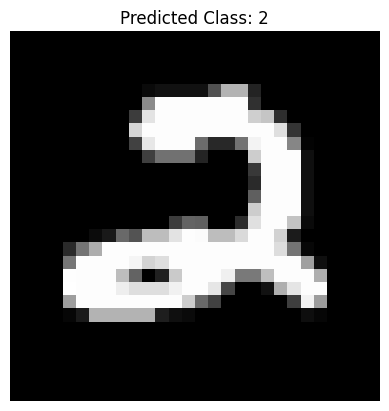

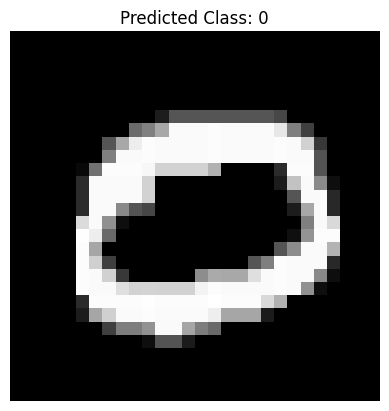

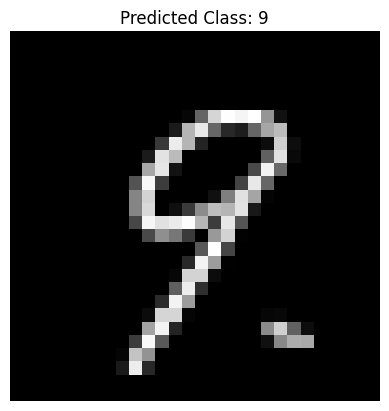

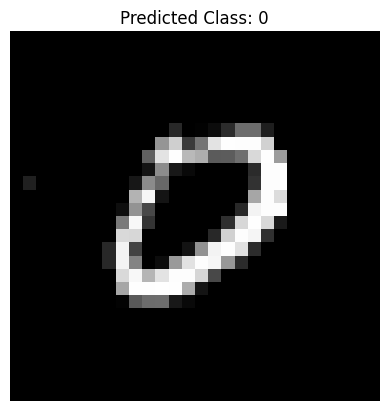

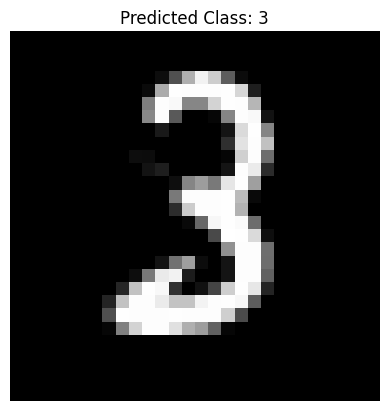

In [36]:
# Display the first 5 test images with their predicted labels
for i in range(5):
    plt.imshow(test[i], cmap='gray')
    plt.title(f"Predicted Class: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()

In [37]:
# Evaluation Metrics

predict_labels = np.argmax(predict, axis = 1)
predict_labels

array([2, 0, 9, ..., 3, 9, 2])

In [ ]:
val_predict = model.predict(X_val)
val_predict_labels = np.argmax(val_predict, axis = 1)
y_val_labels = np.argmax(y_val, axis = 1)

132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


In [ ]:
cm = confusion_matrix(y_val_labels, val_predict_labels)
print(cm)

[[408   1   0   0   1   0   1   0   0   0]
 [  0 474   5   3   0   1   0   0   2   0]
 [  0   0 392   1   0   0   1   4   4   1]
 [  0   0   2 401   0   5   0   2   6   2]
 [  0   2   0   0 449   0   1   0   0   9]
 [  0   0   0   2   0 364   0   0   4   2]
 [  6   1   0   0   0   1 403   0   2   0]
 [  0   0   1   0   1   0   0 439   1   4]
 [  0   1   0   2   2   5   0   0 366   6]
 [  1   2   0   2   0   2   0   8   0 394]]


In [ ]:
classreport = classification_report(y_val_labels, val_predict_labels)
print(classreport)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       411
           1       0.99      0.98      0.98       485
           2       0.98      0.97      0.98       403
           3       0.98      0.96      0.97       418
           4       0.99      0.97      0.98       461
           5       0.96      0.98      0.97       372
           6       0.99      0.98      0.98       413
           7       0.97      0.98      0.98       446
           8       0.95      0.96      0.95       382
           9       0.94      0.96      0.95       409

    accuracy                           0.97      4200
   macro avg       0.97      0.97      0.97      4200
weighted avg       0.97      0.97      0.97      4200




### 3. **Overfitting and Underfitting**

- **Overfitting**: This occurs when the model performs well on the training data but poorly on the validation data. It typically happens when the model is too complex or trained for too many epochs. Signs include:
  - Training accuracy is high, but validation accuracy is low or stagnating.
  - Training loss decreases, but validation loss starts to increase.

- **Underfitting**: This occurs when the model performs poorly on both the training and validation data. This often happens when the model is too simple or not trained enough. Signs include:
  - Both training and validation accuracy are low.
  - Training and validation loss are high and don't improve over time.

### 4. **Confusion Matrix**

- **Confusion Matrix**: This provides a detailed view of how well the model is performing across different classes. It shows:
  - **True Positives (TP)**: Correctly classified samples for each class.
  - **False Positives (FP)**: Samples incorrectly classified as a given class.
  - **False Negatives (FN)**: Samples that belong to a given class but were classified incorrectly.
  - **True Negatives (TN)**: Samples correctly classified as not belonging to a given class.

From the confusion matrix, you can infer:
  - **Class Imbalance**: If certain classes have high false positives or false negatives, it may indicate class imbalance.
  - **Model Performance**: Which classes the model is performing well on and which it is struggling with.
  - **Error Types**: Patterns of errors, such as confusion between similar classes.

### Interpreting Specific Cases

1. **Training and Validation Loss Curves**:
   - If both curves decrease and stabilize, your model is likely well-trained.
   - If training loss decreases while validation loss increases, overfitting might be occurring.
   - If both curves are high, your model might be underfitting.

2. **Training and Validation Accuracy Curves**:
   - If both accuracy curves are increasing and eventually plateau, your model is likely learning effectively.
   - If training accuracy is high but validation accuracy is low or decreasing, it indicates overfitting.
   - If both accuracies are low, consider increasing model complexity or training more epochs.

3. **Confusion Matrix**:
   - Look for high counts in diagonal entries (true positives), which indicates good performance.
   - Analyze off-diagonal entries to understand which classes are confused with each other.

### Example Interpretation

- **Training Loss**: Decreases from 0.6 to 0.1.
- **Validation Loss**: Decreases from 0.7 to 0.2 but starts to increase after 8 epochs.

**Inference**:
- The model is learning well from the training data, but it begins to overfit after a certain point, as indicated by the increasing validation loss after 8 epochs.
- **Action**: You might consider stopping training earlier (early stopping), using regularization techniques, or tuning hyperparameters to improve generalization.

By analyzing these metrics, you can make informed decisions about how to adjust your model, data, and training process to achieve better performance.